원-핫 인코딩(One-hot encoding)이란?
원-핫 인코딩은 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식입니다. 이렇게 표현된 벡터를 원-핫 벡터(One-hot vector)라고 합니다.

원-핫 인코딩을 두 가지 과정으로 정리해보겠습니다.
(1) 각 단어에 고유한 인덱스를 부여합니다. (정수 인코딩)
(2) 표현하고 싶은 단어의 인덱스의 위치에 1을 부여하고, 다른 단어의 인덱스의 위치에는 0을 부여합니다.



In [5]:
#torkenize
from konlpy.tag import Okt   #Open Korean Text ->  Okt

okt=Okt()
token=okt.morphs("나는 자연어 처리를 배운다")
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


In [7]:
#indexing (빈도순대로 indexing)
word_index={}
for voca in token:
    if voca not in word_index.keys():
        word_index[voca]=len(word_index)

print(word_index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [15]:
def one_hot(word,word_index):
    one_hot_V=[0]*(len(word_index))
    index=word_index[word]
    one_hot_V[index]=1
    return one_hot_V

one_hot('나',word_index)
#one_hot('탈출',word_index)  --> word_index에 없는 단어는 에러

[1, 0, 0, 0, 0, 0]

원-핫 인코딩(One-hot encoding)의 한계
**이러한 표현 방식은 단어의 개수가 늘어날 수록, 벡터를 저장하기 위해 필요한 공간이 계속 늘어난다는 단점이 있습니다. 다른 말로는 벡터의 차원이 계속 늘어난다고도 표현합니다.** 원 핫 벡터는 단어 집합의 크기가 곧 벡터의 차원 수가 됩니다. 가령, 단어가 1,000개인 코퍼스를 가지고 원 핫 벡터를 만들면, 모든 단어 각각은 모두 1,000개의 차원을 가진 벡터가 됩니다. 다시 말해 모든 단어 각각은 하나의 값만 1을 가지고, 999개의 값은 0의 값을 가지는 벡터가 되는데 이는 저장 공간 측면에서는 매우 비효율적인 표현 방법입니다.

**또한 원-핫 벡터는 단어의 유사도를 표현하지 못한다는 단점이 있습니다.** 예를 들어서 늑대, 호랑이, 강아지, 고양이라는 4개의 단어에 대해서 원-핫 인코딩을 해서 각각, [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]이라는 원-핫 벡터를 부여받았다고 합시다. 이 때 원-핫 벡터로는 강아지와 늑대가 유사하고, 호랑이와 고양이가 유사하다는 것을 표현할 수가 없습니다. 좀 더 극단적으로는 강아지, 개, 냉장고라는 단어가 있을 때 강아지라는 단어가 개와 냉장고라는 단어 중 어떤 단어와 더 유사한지도 알 수 없습니다.

**단어 간 유사성을 알 수 없다는 단점은 검색 시스템 등에서 심각한 문제입니다.** 가령, 여행을 가려고 웹 검색창에 '삿포로 숙소'라는 단어를 검색한다고 합시다. 제대로 된 검색 시스템이라면, '삿포로 숙소'라는 검색어에 대해서 '삿포로 게스트 하우스', '삿포로 료칸', '삿포로 호텔'과 같은 유사 단어에 대한 결과도 함께 보여줄 수 있어야 합니다. 하지만 단어간 유사성을 계산할 수 없다면, '게스트 하우스'와 '료칸'과 '호텔'이라는 **연관 검색어를 보여줄 수 없습니다.**

워드 임베딩(Word Embedding)
워드 임베딩(Word Embedding)은 단어를 벡터로 표현하는 것을 말합니다. 워드 임베딩은 단어를 밀집 표현으로 변환하는 방법을 말합니다

**============================================================================================================**

희소 표현(Sparse Representation)
앞서 원-핫 인코딩을 통해서 나온 원-핫 벡터들은 표현하고자 하는 단어의 인덱스의 값만 1이고, 나머지 인덱스에는 전부 0으로 표현되는 벡터 표현 방법이었습니다.
**이렇게 벡터 또는 행렬(matrix)의 값이 대부분이 0으로 표현되는 방법을 희소 표현(sparse representation)이라고 합니다.**
그러니까 원-핫 벡터는 희소 벡터(sparse vector)입니다.

이러한 희소 벡터의 문제점은 단어의 개수가 늘어나면 벡터의 차원이 한없이 커진다는 점입니다.
원-핫 벡터로 표현할 때는 갖고 있는 코퍼스에 단어가 10,000개였다면 벡터의 차원은 10,000이어야만 했습니다. 
심지어 그 중에서 단어의 인덱스에 해당되는 부분만 1이고 나머지는 0의 값을 가져야만 했습니다. 
단어 집합이 클수록 고차원의 벡터가 됩니다. 예를 들어 단어가 10,000개 있고 강아지란 단어의 인덱스는 5였다면 원 핫 벡터는 이렇게 표현되어야 했습니다.

Ex) 강아지 = [ 0 0 0 0 0 1 0 0 0 0 0 0 ... 중략 ... 0] # 이 때 1 뒤의 0의 수는 9994개.

이러한 벡터 표현은 공간적 낭비를 불러일으킵니다. 
원-핫 벡터의 문제점은 단어 벡터 간 유사도를 표현할 수 없다는 점도 있습니다. 
예를 들어보겠습니다. dog, cat, computer, netbook, book 이러한 단어가 5개에 대해서 원-핫 인코딩을 한다고 해봅시다. 
우선 이 단어들에 0, 1, 2, 3, 4라는 고유한 정수를 부여합다. 
그리고 나서 단어의 개수가 5개이므로 벡터의 차원으로 5로하고 부여된 각 고유한 정수를 인덱스로 하여 해당 인덱스에는 1, 나머지는 0의 값을 채워넣습니다. 

사람이 생각하기에 강아지와 고양이라는 단어의 유사도는 고양이와 컴퓨터라는 단어의 유사도보다 높을 것이며, 컴퓨터와 넷북이라는 단어의 유사도는 넷북과 책이라는 단어의 유사도보다 높을 것 같지만 어떤 단어들을 선택해서 코사인 유사도를 구해도 유사도는 전부 동일합니다. 단어 간 의미적 유사도를 반영할 수 없다는 것은 자연어 처리에서 치명적입니다.


In [27]:
import torch
dog=torch.FloatTensor([1,0,0,0,0])
cat=torch.FloatTensor([0,1,0,0,0])
computer = torch.FloatTensor([0, 0, 1, 0, 0])
netbook = torch.FloatTensor([0, 0, 0, 1, 0])
book = torch.FloatTensor([0, 0, 0, 0, 1])

print(torch.cosine_similarity(dog,cat, dim=0))   #dim=>가로줄의 수 0~n까지
print(torch.cosine_similarity(cat, computer, dim=0))
print(torch.cosine_similarity(computer, netbook, dim=0))
print(torch.cosine_similarity(netbook, book, dim=0))

print(torch.cosine_similarity(netbook, netbook, dim=0))

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(1.)


밀집 표현(Dense Representation)
이러한 희소 표현과 반대되는 표현이 있으니, 이를 밀집 표현(dense representation)이라고 합니다. **밀집 표현은 벡터의 차원을 단어 집합의 크기로 상정하지 않습니다. 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춥니다. 또한, 이 과정에서 더 이상 0과 1만 가진 값이 아니라 실수값을 가지게 됩니다.** 다시 희소 표현의 예를 가져와봅시다.

Ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0] # 이 때 1 뒤의 0의 수는 9995개. 차원은 10,000

예를 들어 10,000개의 단어가 있을 때 강아지란 단어를 표현하기 위해서는 위와 같은 표현을 사용했습니다. 하지만 밀집 표현을 사용하고, 사용자가 밀집 표현의 차원을 128로 설정한다면, 모든 단어의 벡터 표현의 차원은 128로 바뀌면서 모든 값이 실수가 됩니다.

Ex) 강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...] # 이 벡터의 차원은 128

이 경우 벡터의 차원이 조밀해졌다고 하여 밀집 벡터(dense vector)라고 합니다.


워드 임베딩(Word Embedding)
**단어를 밀집 벡터(dense vector)의 형태로 표현하는 방법을 워드 임베딩(word embedding)이라고 합니다. 그리고 이 밀집 벡터를 워드 임베딩 과정을 통해 나온 결과라고 하여 임베딩 벡터(embedding vector)라고도 합니다.**

워드 임베딩 방법론으로는 LSA, Word2Vec, FastText, Glove 등이 있습니다. 파이토치에서 제공하는 도구인 nn.embedding()는 앞서 언급한 방법들을 사용하지는 않지만, 단어를 랜덤한 값을 가지는 밀집 벡터로 변환한 뒤에, 인공 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습하는 방법을 사용합니다. 아래의 표는 앞서 배운 원-핫 벡터와 지금 배우고 있는 임베딩 벡터의 차이를 보여줍니다.

-	        원-핫 벡터	     임베딩 벡터
차원	     고차원(단어 집합의 크기)	저차원
다른표현	   희소 벡터의 일종 	밀집 벡터의 일종
표현방법	     수동 훈련       데이터로부터 학습함
값의타입	       1과 0	        실수


워드투벡터(Word2Vec)
앞서 원-핫 인코딩 챕터에서 원-핫 벡터는 단어 간 유사도를 계산할 수 없다는 단점이 있음을 언급한 적이 있습니다. 그래서 단어 간 유사도를 반영할 수 있도록 단어의 의미를 벡터화 할 수 있는 방법이 필요합니다. 그리고 이를 위해서 사용되는 대표적인 방법이 워드투벡터(Word2Vec)입니다. Word2Vec의 개념을 설명하기에 앞서, Word2Vec가 어떤 일을 할 수 있는지 먼저 확인해보겠습니다.

한국-서울+도쿄 = 일본

http://w.elnn.kr/search/

위 사이트는 한국어 단어에 대해서 벡터 연산을 해볼 수 있는 사이트입니다. 위 사이트에서는 단어들(실제로는 Word2Vec 벡터)로 더하기, 빼기 연산을 할 수 있습니다. 예를 들어 아래의 식에서 좌변을 집어 넣으면, 우변의 답들이 나옵니다.

고양이 + 애교 = 강아지
한국 - 서울 + 도쿄 = 일본
박찬호 - 야구 + 축구 = 호나우두

신기하게도 단어가 가지고 있는 어떤 의미들을 가지고 연산을 하고 있는 것처럼 보입니다. 이런 연산이 가능한 이유는 각 단어 벡터가 단어 간 유사도를 반영한 값을 가지고 있기 때문입니다. 


희소 표현(Sparse Representation)
앞서 원-핫 인코딩을 통해서 나온 원-핫 벡터들은 표현하고자 하는 단어의 인덱스의 값만 1이고, 나머지 인덱스에는 전부 0으로 표현되는 벡터 표현 방법이었습니다. 이렇게 벡터 또는 행렬(matrix)의 값이 대부분이 0으로 표현되는 방법을 희소 표현(sparse representation)이라고 합니다. 그러니까 원-핫 벡터는 희소 벡터(sparse vector)입니다.

하지만 이러한 표현 방법은 각 단어간 유사성을 표현할 수 없다는 단점이 있었고, 이를 위한 대안으로 단어의 '의미'를 다차원 공간에 벡터화하는 방법을 찾게되는데, 이러한 표현 방법을 분산 표현(distributed representation)이라고 합니다. 그리고 이렇게 분산 표현을 이용하여 단어의 유사도를 벡터화하는 작업은 워드 임베딩(embedding) 작업에 속하기 때문에 이렇게 표현된 벡터 또한 임베딩 벡터(embedding vector)라고 하며, 저차원을 가지므로 바로 앞의 챕터에서 배운 밀집 벡터(dense vector)에도 속합니다.


분산 표현(Distributed Representation)
분산 표현(distributed representation) 방법은 기본적으로 분포 가설(distributional hypothesis)이라는 가정 하에 만들어진 표현 방법입니다. **이 가정은 '비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다'라는 가정입니다.** 강아지란 단어는 귀엽다, 예쁘다, 애교 등의 단어가 주로 함께 등장하는데 분포 가설에 따라서 저런 내용을 가진 텍스트를 벡터화한다면 저 단어들은 의미적으로 가까운 단어가 됩니다. 분산 표현은 분포 가설을 이용하여 단어들의 셋을 학습하고, 벡터에 단어의 의미를 여러 차원에 분산하여 표현합니다.

이렇게 표현된 벡터들은 원-핫 벡터처럼 벡터의 차원이 단어 집합(vocabulary)의 크기일 필요가 없으므로, 벡터의 차원이 상대적으로 저차원으로 줄어듭니다. 예를 들어 단어가 10,000개 있고 인덱스가 1부터 시작한다고 하였을 때 강아지란 단어의 인덱스는 5였다면 강아지란 단어를 표현하는 원-핫 벡터는 다음과 같았습니다.

Ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0]

1이란 값 뒤에는 0이 9,995개가 있는 벡터가 됩니다. 하지만 Word2Vec로 임베딩 된 벡터는 굳이 벡터의 차원이 단어 집합의 크기가 될 필요가 없습니다. 강아지란 단어를 표현하기 위해 사용자가 설정한 차원을 가지는 벡터가 되면서 각 차원은 실수형의 값을 가집니다.

Ex) 강아지 = [0.2 0.3 0.5 0.7 0.2 ... 중략 ... 0.2]

**요약하면 희소 표현이 고차원에 각 차원이 분리된 표현 방법이었다면, 분산 표현은 저차원에 단어의 의미를 여러 차원에다가 분산하여 표현합니다. 이런 표현 방법을 사용하면 단어 간 유사도를 계산할 수 있습니다.**

이를 위한 학습 방법으로는 NNLM, RNNLM 등이 있으나 요즘에는 해당 방법들의 속도를 대폭 개선시킨 Word2Vec가 많이 쓰이고 있습니다.


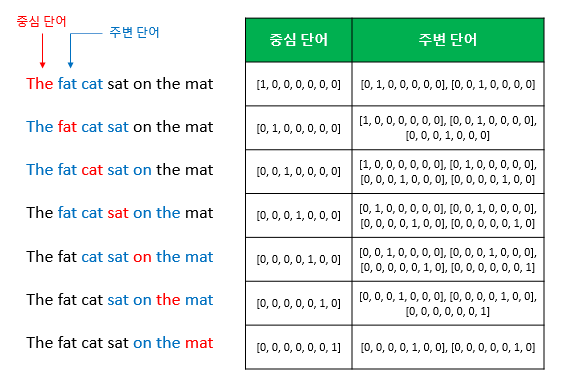

윈도우 크기를 정했다면, 윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만들 수 있는데, 이 방법을 슬라이딩 윈도우(sliding window)라고 합니다.

위 그림에서 좌측의 중심 단어와 주변 단어의 변화는 윈도우 크기가 2일때, 슬라이딩 윈도우가 어떤 식으로 이루어지면서 데이터 셋을 만드는지 보여줍니다. 또한 Word2Vec에서 입력은 모두 원-핫 벡터가 되어야 하는데, 우측 그림은 중심 단어와 주변 단어를 어떻게 선택했을 때에 따라서 각각 어떤 원-핫 벡터가 되는지를 보여줍니다. 위 그림은 결국 CBOW를 위한 전체 데이터 셋을 보여주는 것입니다.

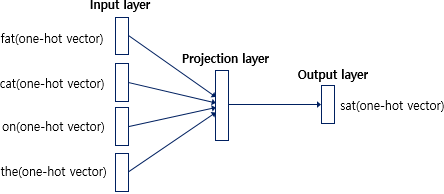

CBOW의 인공 신경망을 간단히 도식화하면 위와 같습니다. 입력층(Input layer)의 입력으로서 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안에 있는 주변 단어들의 원-핫 벡터가 들어가게 되고, 출력층(Output layer)에서 예측하고자 하는 중간 단어의 원-핫 벡터가 필요합니다. 뒤에서 설명하겠지만, Word2Vec의 학습을 위해서 이 중간 단어의 원-핫 벡터가 필요합니다.

또한 위 그림에서 알 수 있는 사실은, Word2Vec은 딥 러닝 모델(Deep Learning Model)은 아니라는 점입니다. **보통 딥 러닝이라함은, 입력층과 출력층 사이의 은닉층의 개수가 충분히 쌓인 신경망을 학습할 때를 말하는데 Word2Vec는 입력층과 출력층 사이에 하나의 은닉층만이 존재합니다.** **이렇게 은닉층(hidden Layer)이 1개인 경우에는 일반적으로 심층신경망(Deep Neural Network)이 아니라 얕은신경망(Shallow Neural Network)이라고 부릅니다.** 또한 Word2Vec의 은닉층은 일반적인 은닉층과는 달리 **활성화 함수가 존재하지 않으며 룩업 테이블이라는 연산을 담당하는 층으로 일반적인 은닉층과 구분하기 위해 투사층(projection layer)이라고 부르기도 합니다.**


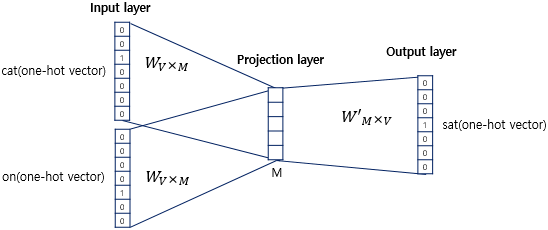

CBOW의 인공 신경망을 좀 더 확대하여, 동작 메커니즘에 대해서 상세하게 알아보도록 하겠습니다. 이 그림에서 주목해야할 것은 두 가지 입니다. 하나는 투사층의 크기가 M이라는 점입니다. CBOW에서 투사층의 크기 M은 임베딩하고 난 벡터의 차원이 됩니다. 다시 말해, 위의 그림에서 투사층의 크기는 M=5이기 때문에 CBOW를 수행하고나서 얻는 각 단어의 임베딩 벡터의 차원은 5가 될 것입니다.

두번째는 입력층과 투사층 사이의 가중치 W는 V × M 행렬이며, 투사층에서 출력층사이의 가중치 W'는 M × V 행렬이라는 점입니다. 여기서 V는 단어 집합의 크기를 의미합니다. 즉, 위의 그림처럼 원-핫 벡터의 차원이 7이고, M은 5라면 가중치 W는 7 × 5 행렬이고, W'는 5 × 7 행렬이 될 것입니다. 주의할 점은 이 두 행렬은 동일한 행렬을 전치(transpose)한 것이 아니라, 서로 다른 행렬이라는 점입니다. 인공 신경망의 훈련 전에 이 가중치 행렬 W와 W'는 대게 굉장히 작은 랜덤 값을 가지게 됩니다. CBOW는 주변 단어로 중심 단어를 더 정확히 맞추기 위해 계속해서 이 W와 W'를 학습해가는 구조입니다.


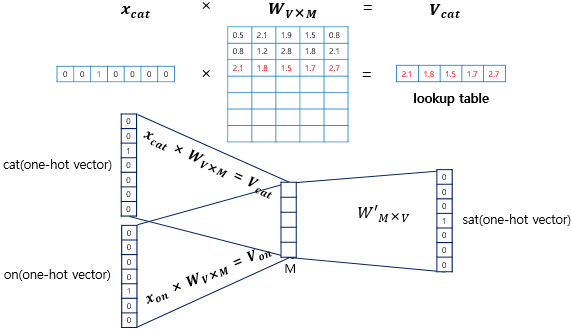

입력으로 들어오는 주변 단어의 원-핫 벡터와 가중치 W 행렬의 곱이 어떻게 이루어지는지 보겠습니다. 위 그림에서는 각 주변 단어의 원-핫 벡터를 X로 표기하였습니다. 입력 벡터는 원-핫 벡터입니다. i번째 인덱스에 1이라는 값을 가지고 그 외의 0의 값을 가지는 입력 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일합니다. 그래서 이 작업을 룩업 테이블(lookup table)이라고 부릅니다. 앞서 CBOW의 목적은 W와 W'를 잘 훈련시키는 것이라고 언급한 적이 있는데, 사실 그 이유가 여기서 lookup해온 W의 각 행벡터가 사실 Word2Vec을 수행한 후의 각 단어의 M차원의 크기를 갖는 임베딩 벡터들이기 때문입니다.

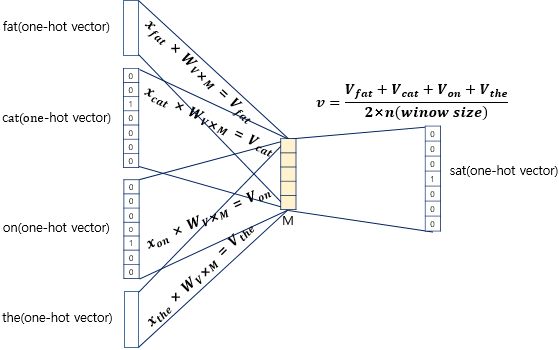

이렇게 각 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구하게 됩니다. 만약 윈도우 크기가 2라면, 입력 벡터의 총 개수는 2n이므로 중간 단어를 예측하기 위해서는 총 4개가 입력 벡터로 사용됩니다. 그렇기 때문에 평균을 구할 때는 4개의 결과 벡터에 대해서 평균을 구하게 됩니다. 투사층에서 벡터의 평균을 구하는 부분은 CBOW가 Skip-Gram과 다른 차이점이기도 합니다. 뒤에서 보게되겠지만, Skip-Gram은 입력이 중심 단어 하나이기때문에 투사층에서 벡터의 평균을 구하지 않습니다.

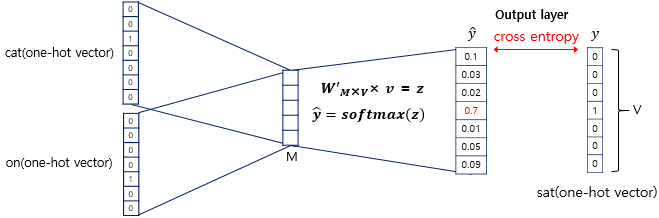


스코어 벡터의 j번째 인덱스가 가진 0과 1사이의 값은 j번째 단어가 중심 단어일 확률을 나타냅니다. 그리고 이 스코어 벡터는 우리가 실제로 값을 알고있는 벡터인 중심 단어 원-핫 벡터의 값에 가까워져야 합니다. 스코어 벡터를 y^라고 하겠습니다. 중심 단어를 y로 했을 때, 이 두 벡터값의 오차를 줄이기위해 CBOW는 손실 함수(loss function)로 cross-entropy 함수를 사용합니다

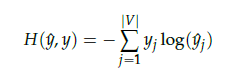

cross-entropy 함수에 실제 중심 단어인 원-핫 벡터와 스코어 벡터를 입력값으로 넣고, 이를 식으로 표현하면 위와 같습니다.

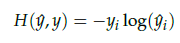

그런데 y가 원-핫 벡터라는 점을 고려하면, 이 식은 위와 같이 간소화시킬 수 있습니다. 이 식이 왜 loss function으로 적합한지 알아보겠습니다. c를 중심 단어에서 1을 가진 차원의 값의 인덱스라고 한다면, 는 y^과 y를 정확하게 예측한 경우가 됩니다. 이를 식에 대입해보면 -1 log(1) = 0이 되기 때문에, 결과적으로 y^과 y를 정확하게 예측한 경우의 cross-entropy의 값은 0이 됩니다. 즉,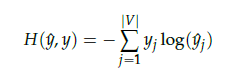  이 값을 최소화하는 방향으로 학습해야 합니다.

Skip-gram
Skip-gram은 CBOW를 이해했다면, 메커니즘 자체는 동일하기 때문에 쉽게 이해할 수 있습니다. 앞서 CBOW에서는 주변 단어를 통해 중심 단어를 예측했다면, Skip-gram은 중심 단어에서 주변 단어를 예측하려고 합니다.

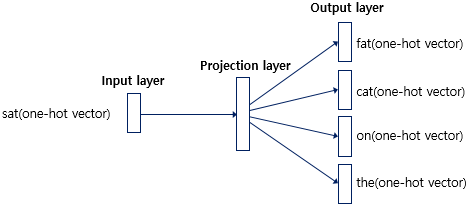

앞서 언급한 동일한 예문에 대해서 인공 신경망을 도식화해보면 위와 같습니다. 이제 중심 단어에 대해서 주변 단어를 예측하기 때문에, 투사층에서 벡터들의 평균을 구하는 과정은 없습니다.

여러 논문에서 성능 비교를 진행했을 때, 전반적으로 Skip-gram이 CBOW보다 성능이 좋다고 알려져 있습니다.


네거티브 샘플링(Negative Sampling)
대체적으로 Word2Vec를 사용한다고 하면 SGNS(Skip-Gram with Negative Sampling)을 사용합니다. Skip-gram을 사용하는데, 네거티브 샘플링(Negative Sampling)이란 방법까지 추가로 사용한다는 겁니다. Skip-gram을 전제로 네거티브 샘플링에 대해서 알아봅시다.

위에서 배운 Word2Vec 모델에는 한 가지 문제점이 있습니다. 바로 속도입니다. Word2Vec의 마지막 단계를 주목해봅시다. 출력층에 있는 소프트맥스 함수는 단어 집합 크기의 벡터 내의 모든 값을 0과 1사이의 값이면서 모두 더하면 1이 되도록 바꾸는 작업을 수행합니다. 그리고 이에 대한 오차를 구하고 모든 단어에 대한 임베딩을 조정합니다. 그 단어가 중심 단어나 주변 단어와 전혀 상관없는 단어라도 마찬가지 입니다. 그런데 만약 단어 집합의 크기가 수백만에 달한다면 이 작업은 굉장히 무거운 작업입니다.

여기서 중요한 건 Word2Vec이 모든 단어 집합에 대해서 소프트맥스 함수를 수행하고, 역전파를 수행하므로 주변 단어와 상관 없는 모든 단어까지의 워드 임베딩 조정 작업을 수행한다는 겁니다. 만약 마지막 단계에서 '강아지'와 '고양이'와 같은 단어에 집중하고 있다면, Word2Vec은 사실 '돈가스'나 '컴퓨터'와 같은 연관 관계가 없는 수많은 단어의 임베딩을 조정할 필요가 없습니다.

이를 조금 더 효율적으로 할 수 있는 방법이 없을까요? 전체 단어 집합이 아니라 일부 단어 집합에 대해서만 고려하면 안 될까요? 이렇게 일부 단어 집합을 만들어봅시다. '강아지', '고양이', '애교'와 같은 주변 단어들을 가져옵니다. 그리고 여기에 '돈가스', '컴퓨터', '회의실'과 같은 랜덤으로 선택된 주변 단어가 아닌 상관없는 단어들을 일부만 갖고옵니다. 이렇게 전체 단어 집합보다 훨씬 작은 단어 집합을 만들어놓고 마지막 단계를 이진 분류 문제로 바꿔버리는 겁니다. 즉, Word2Vec은 주변 단어들을 긍정(positive)으로 두고 랜덤으로 샘플링 된 단어들을 부정(negative)으로 둔 다음에 이진 분류 문제를 수행합니다.

이는 기존의 다중 클래스 분류 문제를 이진 분류 문제로 바꾸면서도 연산량에 있어서 훨씬 효율적입니다.



In [1]:
#영어 Word2Vec 만들기

import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")


('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f8169700a90>)

In [35]:
text=open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text=etree.parse(text)

parse='\n'.join(target_text.xpath('//content/text()'))
content=re.sub(r'\([^)]*\)',' ',parse)
               
sent=sent_tokenize(content)

normallize=[]
for str in sent:
    tokens=re.sub(r'[^a-z0-9]+',' ', str.lower())
    normallize.append(tokens)

result=[word_tokenize(sentence) for sentence in normallize]

print(len(result))

for line in result[:3]:
    print(line)

273424
['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [44]:
#Word2Vec 훈련시키기
from gensim.models import Word2Vec
from gensim.models import KeyedVectors


model=Word2Vec(sentences=result,vector_size=100, window=5, min_count=5,workers=4, sg=0)

'''
vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
window = 컨텍스트 윈도우 크기
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
workers = 학습을 위한 프로세스 수
sg = 0은 CBOW, 1은 Skip-gram.
'''
print(model)
model_result=model.wv.most_similar('man')  #man과 유사한 단어로 woman, guy, boy, lady, girl, gentleman, soldier, kid 등을 출력하는 것을 볼 수 있습니다.
print(model_result)

Word2Vec<vocab=21613, vector_size=100, alpha=0.025>
[('woman', 0.8496211171150208), ('guy', 0.8280652761459351), ('lady', 0.7790693640708923), ('gentleman', 0.7561917304992676), ('boy', 0.7534310817718506), ('soldier', 0.7352474331855774), ('girl', 0.7208338379859924), ('kid', 0.6985688805580139), ('david', 0.6664615869522095), ('poet', 0.6656246185302734)]


In [47]:
#Word2Vec 모델 저장하고 로드하기
model.wv.save_word2vec_format('eng_w2v')
load_model=KeyedVectors.load_word2vec_format('eng_w2v')

model_result=load_model.most_similar('man')  #로드한 모델에 대해서 다시 man과 유사한 단어를 출력
print(model_result)

[('woman', 0.8496211171150208), ('guy', 0.8280652761459351), ('lady', 0.7790693640708923), ('gentleman', 0.7561917304992676), ('boy', 0.7534310817718506), ('soldier', 0.7352474331855774), ('girl', 0.7208338379859924), ('kid', 0.6985688805580139), ('david', 0.6664615869522095), ('poet', 0.6656246185302734)]


In [74]:
#한국어 Word2Vec 만들기(네이버 영화 리뷰)
from tqdm import tqdm
import pandas as ps
import matplotlib.pyplot as mp
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

#urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

train_data=ps.read_table('ratings.txt')
train_data[:5]
print(len(train_data))
print(train_data.isnull().values.any())

train_datas=train_data.dropna(how='any')
print(train_datas.isnull().values.any()) #결측치 행 확인 : isnull //
'''
DataFrame에 NaN값이 있는지 알고 싶다면 DataFrame에 NaN값이 있으면 True를 반환하는 isnull().values.any()메서드를 사용할 수 있습니다. 
DataFrame에 NaN항목이 하나도 없으면 False입니다.
'''

print(len(train_datas))  #결측값이 삭제된 후의 리뷰 개수를 확인합니다.

train_data['document']=train_data['document'].str.replace('ㄱ-ㅎ ㅏ-ㅣ 가-힣',' ')
train_data

200000
True
False
199992


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [80]:
stopword=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
okt=Okt()
tokenize = []
for sentence in tqdm(train_data['document']):

    tokenize_sentence=okt.morphs(sentence, stem=False) #tokenize
    #tokenize_sentence=okt.morphs(sentence, stem=True) # 토큰화
    stopword_remove=[word for word in tokenize_sentence if not word in stopword]    
    tokenize.append(stopword_remove)


# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized))
print('리뷰의 평균 길이 :',sum(map(len, tokenized))/len(tokenized))
mp.hist([len(review) for review in tokenized], bins=50)
mp.xlabel('length of samples')
mp.ylabel('number of samples')
mp.show()


 23%|████████▏                          | 46471/200000 [01:44<05:46, 443.24it/s]


AssertionError: phrase input should be string, not <class 'float'>

200000
True
False
199992


100%|██████████████████████████████████| 199992/199992 [08:26<00:00, 395.20it/s]


리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 12.338453538141525


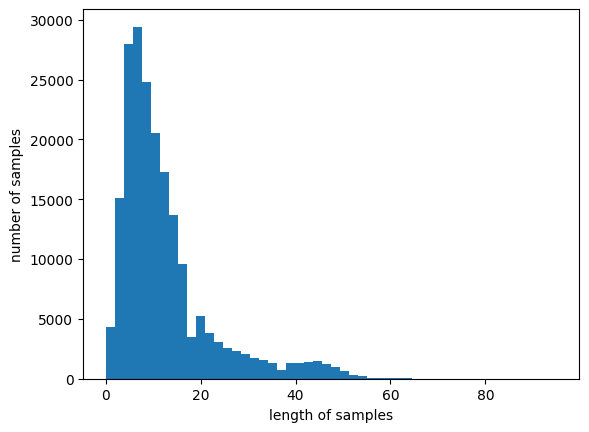

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
train_data = pd.read_table('ratings.txt')
print(len(train_data)) # 리뷰 개수 출력
# NULL 값 존재 유무
print(train_data.isnull().values.any())
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
print(len(train_data)) # 리뷰 개수 출력
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [ ]:
from gensim.models import Word2Vec
model=Word2Vec(sentence=tokenize, vector_size=100, window=5,min_count=5,worder)
model.wv.vectors.shape
print(model.wv.vectors.shape)

print(model.wv.most_similar('최민식'))
print(model.wv.most_similar('히어로'))


사전 훈련된 Word2Vec 임베딩(Pre-trained Word2Vec embedding) 소개
자연어 처리 작업을 할때, 케라스의 Embedding()를 사용하여 갖고 있는 훈련 데이터로부터 처음부터 임베딩 벡터를 훈련시키기도 하지만, 위키피디아 등의 방대한 데이터로 사전에 훈련된 워드 임베딩(pre-trained word embedding vector)를 가지고 와서 해당 벡터들의 값을 원하는 작업에 사용 할 수도 있습니다.

예를 들어서 감성 분류 작업을 하는데 훈련 데이터의 양이 부족한 상황이라면, 다른 방대한 데이터를 Word2Vec이나 GloVe 등으로 사전에 학습시켜놓은 임베딩 벡터들을 가지고 와서 모델의 입력으로 사용하는 것이 때로는 더 좋은 성능을 얻을 수 있습니다. 사전 훈련된 워드 임베딩을 가져와서 간단히 단어들의 유사도를 구해보는 실습을 해보겠습니다. 실제로 모델에 적용해보는 실습은 향후에 진행합니다.

구글이 제공하는 사전 훈련된(미리 학습되어져 있는) Word2Vec 모델을 사용하는 방법에 대해서 알아보겠습니다. 구글은 사전 훈련된 3백만 개의 Word2Vec 단어 벡터들을 제공합니다. 각 임베딩 벡터의 차원은 300입니다. gensim을 통해서 이 모델을 불러오는 건 매우 간단합니다. 이 모델을 다운로드하고 파일 경로를 기재하면 됩니다.

모델 다운로드 경로 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [89]:
import gensim
import urllib.request
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# 구글의 사전 훈련된 Word2Vec 모델을 로드.
#urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
#                           filename="GoogleNews-vectors-negative300.bin.gz")  -->> 작동안됨
word2vec=gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

print(word2vec.vectors.shape)

print(word2vec.similarity('this','is'))
print(word2vec.similarity('post','book'))
print(word2vec['book'])

'''
참고 : Word2vec 모델은 자연어 처리에서 단어를 밀집 벡터로 만들어주는 단어 임베딩 방법론이지만 최근에 들어서는 자연어 처리를 넘어서 추천 시스템에도 사용되고 있는 모델입니다.
적당하게 데이터를 나열해주면 Word2vec은 위치가 근접한 데이터를 유사도가 높은 벡터를 만들어준다는 점에서 착안된 아이디어입니다. 
관심있는 분들은 구글에 'item2vec'을 검색해보세요.
'''

(3000000, 300)
0.4079703
0.057204388
[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.0

워드 임베딩 모델로부터 2개의 tsv 파일 생성하기
이번 실습에서는 학습한 임베딩 벡터들을 시각화해보겠습니다. 꼭 Word2Vec 등으로 학습해야하는 방법이 정해져있지는 없고, GloVe 등 다른 방법으로 훈련되어있어도 상관없습니다. 시각화를 위해서는 이미 모델을 학습하고, 파일로 저장되어져 있어야 합니다. 모델이 저장되어져 있다면 아래 커맨드를 통해 시각화에 필요한 파일들을 생성할 수 있습니다.

!python -m gensim.scripts.word2vec2tensor --input 모델이름 --output 모델이름

임베딩 프로젝터를 사용하여 시각화하기
링크 : https://projector.tensorflow.org/

In [93]:
!python3 -m gensim.scripts.word2vec2tensor --input eng_w2v --output eng_w2v


2024-01-09 22:55:52,744 - word2vec2tensor - INFO - running /home/eternal/.local/lib/python3.10/site-packages/gensim/scripts/word2vec2tensor.py --input eng_w2v --output eng_w2v
2024-01-09 22:55:52,744 - keyedvectors - INFO - loading projection weights from eng_w2v
2024-01-09 22:55:53,165 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (21613, 100) matrix of type float32 from eng_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-01-09T22:55:53.164428', 'gensim': '4.3.2', 'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]', 'platform': 'Linux-6.2.0-39-generic-x86_64-with-glibc2.35', 'event': 'load_word2vec_format'}
2024-01-09 22:55:53,746 - word2vec2tensor - INFO - 2D tensor file saved to eng_w2v_tensor.tsv
2024-01-09 22:55:53,746 - word2vec2tensor - INFO - Tensor metadata file saved to eng_w2v_metadata.tsv
2024-01-09 22:55:53,747 - word2vec2tensor - INFO - finished running word2vec2tensor.py


스탠포드 대학교의 글로브(GloVe)
글로브(Global Vectors for Word Representation, GloVe)는 카운트 기반과 예측 기반을 모두 사용하는 방법론으로 2014년에 미국 스탠포드대학에서 개발한 단어 임베딩 방법론입니다. 앞서 학습하였던 기존의 카운트 기반의 LSA(Latent Semantic Analysis)와 예측 기반의 Word2Vec의 단점을 지적하며 이를 보완한다는 목적으로 나왔고, 실제로도 Word2Vec만큼 뛰어난 성능을 보여줍니다. 현재까지의 연구에 따르면 단정적으로 Word2Vec와 GloVe 중에서 어떤 것이 더 뛰어나다고 말할 수는 없고, 이 두 가지 전부를 사용해보고 성능이 더 좋은 것을 사용하는 것이 바람직합니다.

기존 방법론에 대한 비판
LSA는 각 단어의 빈도수를 카운트 한 행렬이라는 전체적인 통계 정보를 입력으로 받아 차원을 축소(Truncated SVD)하여 잠재된 의미를 끌어내는 방법론입니다. 반면, Word2Vec는 실제값과 예측값에 대한 오차를 손실 함수를 통해 줄여나가며 학습하는 예측 기반의 방법론이었습니다. 서로 다른 방법을 사용하는 이 두 방법론은 각각 장, 단점이 있습니다.

LSA는 카운트 기반으로 코퍼스의 전체적인 통계 정보를 고려하기는 하지만, 왕:남자 = 여왕:? (정답은 여자)와 같은 단어 의미의 유추 작업(Analogy task)에는 성능이 떨어집니다. Word2Vec는 예측 기반으로 단어 간 유추 작업에는 LSA보다 뛰어나지만, 임베딩 벡터가 윈도우 크기 내에서만 주변 단어를 고려하기 때문에 코퍼스의 전체적인 통계 정보를 반영하지 못합니다. GloVe는 이러한 기존 방법론들의 각각의 한계를 지적하며, LSA의 메커니즘이었던 카운트 기반의 방법과 Word2Vec의 메커니즘이었던 예측 기반의 방법론 두 가지를 모두 사용합니다.

윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)
단어의 동시 등장 행렬은 행과 열을 전체 단어 집합의 단어들로 구성하고, i 단어의 윈도우 크기(Window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬을 말합니다.

Ex)
I like deep learning
I like NLP
I enjoy flying

윈도우 크기가 N일 때는 좌, 우에 존재하는 N개의 단어만 참고하게 됩니다. 윈도우 크기가 1일 때, 위의 텍스트를 가지고 구성한 동시 등장 행렬은 다음과 같습니다.

카운트	   I	like  enjoy	 deep  learning	NLP	flying

I	       0	 2	    1	  0	      0	     0	  0

like	   2	 0	    0	  1	      0 	 1	  0

enjoy	   1	 0	    0	  0	      0	     0	  1

deep	   0	 1	    0	  0	      1	     0	  0

learning   0	 0	    0	  1	      0	     0 	  0

NLP	       0	 1	    0	  0	      0	     0	  0

flying	   0	 0	    1	  0  	  0  	 0	  0

위 행렬은 행렬을 전치(Transpose)해도 동일한 행렬이 된다는 특징이 있습니다. 그 이유는 i 단어의 윈도우 크기 내에서 k 단어가 등장한 빈도는 반대로 k 단어의 윈도우 크기 내에서 i 단어가 등장한 빈도와 동일하기 때문입니다

링크 : http://web.stanford.edu/class/cs224n/slides/cs224n-2019-lecture02-wordvecs2.pdf


동시 등장 확률(Co-occurrence Probability)
이제 동시 등장 행렬에 대해서 이해했으니, 동시 등장 확률에 대해서 이해해봅시다. 아래의 표는 어떤 동시 등장 행렬을 가지고 정리한 동시 등장 확률(Co-occurrence Probability)을 보여줍니다. 그렇다면, 동시 등장 확률이란 무엇일까요?

동시 등장 확률 P(k|i)는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률입니다.

P(k|i)에서 i를 중심 단어(Center Word), k를 주변 단어(Context Word)라고 했을 때, 위에서 배운 동시 등장 행렬에서 중심 단어 i의 행의 모든 값을 더한 값을 분모로 하고 i행 k열의 값을 분자로 한 값이라고 볼 수 있겠습니다. 다음은 GloVe의 제안 논문에서 가져온 동시 등장 확률을 표로 정리한 하나의 예입니다.

동시 등장 확률과 크기 관계 비(ratio) | k=solid | k=gas | k=water | k=fasion | ------|------|------|------| P(k l ice) | 0.00019 | 0.000066 | 0.003 | 0.000017 | P(k l steam) | 0.000022 | 0.00078 | 0.0022 | 0.000018 | P(k l ice) / P(k l steam) | 8.9 | 0.085 | 1.36 | 0.96 |

위의 표를 통해 알 수 있는 사실은 ice가 등장했을 때 solid가 등장할 확률 0.00019은 steam이 등장했을 때 solid가 등장할 확률인 0.000022보다 약 8.9배 크다는 겁니다. 그도 그럴 것이 solid는 '단단한'이라는 의미를 가졌으니까 '증기'라는 의미를 가지는 steam보다는 당연히 '얼음'이라는 의미를 가지는 ice라는 단어와 더 자주 등장할 겁니다.

수식적으로 다시 정리하여 언급하면 k가 solid일 때, P(solid l ice) / P(solid l steam)를 계산한 값은 8.9가 나옵니다. 이 값은 1보다는 매우 큰 값입니다. 왜냐면 P(solid | ice)의 값은 크고, P(solid | steam)의 값은 작기 때문입니다.

그런데 k를 solid가 아니라 gas로 바꾸면 얘기는 완전히 달라집니다. gas는 ice보다는 steam과 더 자주 등장하므로, P(gas l ice) / P(gas l steam)를 계산한 값은 1보다 훨씬 작은 값인 0.085가 나옵니다. 반면, k가 water인 경우에는 solid와 steam 두 단어 모두와 동시 등장하는 경우가 많으므로 1에 가까운 값이 나오고, k가 fasion인 경우에는 solid와 steam 두 단어 모두와 동시 등장하는 경우가 적으므로 1에 가까운 값이 나옵니다. 보기 쉽도록 조금 단순화해서 표현한 표는 다음과 같습니다.


동시 등장 확률과 크기 관계 비(ratio)    k=solid	k=gas  k=water	  k=fasion

P(k|ice)                        	큰 값	작은 값	큰 값	   작은 값

P(k|steam)                         	작은 값	큰 값	큰 값	   작은 값

P(k|ice)/P(k|steam)              	큰 값	작은 값	1에 가까움  1에 가까움

손실 함수(Loss function)
우선 손실 함수를 설명하기 전에 각 용어를 정리해보겠습니다.

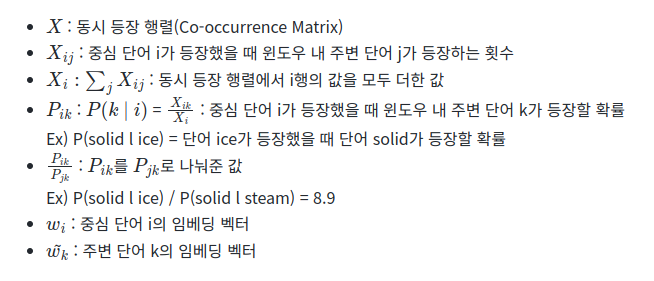

GloVe의 아이디어를 한 줄로 요약하면 **'임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것'입니다.**
**즉, 이를 만족하도록 임베딩 벡터를 만드는 것이 목표입니다. 이를 식으로 표현하면 다음과 같습니다.**
dot prodct(wi,wk)=P(k|i)=P(ik)

 더 정확히는 GloVe는 아래와 같은 관계를 가지도록 임베딩 벡터를 설계합니다.

dot prodct(wi,wk)=log(k|i)=log(ik)

베딩 벡터들을 만들기 위한 손실 함수를 처음부터 차근차근 설계해보겠습니다. 가장 중요한 것은 단어 간의 관계를 잘 표현하는 함수여야 한다는 겁니다. 이를 위해 앞서 배운 개념인 P(jk)/P(jk)를 식에 사용합니다. GloVe의 연구진들은 벡터 wi,wj,wk를 가지고 어떤 함수 F를 수행하면, P(ik)/P(jk)가 나온다는 초기 식으로부터 전개를 시작합니다.

F(wi,wj,wk)=P(jk)/P(jk)

아직 이 함수 F가 어떤 식을 가지고 있는지는 정해진 게 없습니다. 위의 목적에 맞게 근사할 수 있는 함수식은 무수히 많겠으나 최적의 식에 다가가기 위해서 차근, 차근 디테일을 추가해보겠습니다. 함수 F는 두 단어 사이의 동시 등장 확률의 크기 관계 비(ratio) 정보를 벡터 공간에 인코딩하는 것이 목적입니다. 이를 위해 GloVe 연구진들은 wi와 wj라는 두 벡터의 차이를 함수 F의 입력으로 사용하는 것을 제안합니다.

F(wi-wj,wk)=P(jk)/P(jk)

그런데 우변은 스칼라값이고 좌변은 벡터값입니다. 이를 성립하기 해주기 위해서 함수 F의 두 입력에 내적(Dot product)을 수행합니다.

F((wi-wj)**T,wk)=P(jk)/P(jk)

정리하면, 선형 공간(Linear space)에서 단어의 의미 관계를 표현하기 위해 뺄셈과 내적을 택했습니다.

여기서 함수 F가 만족해야 할 필수 조건이 있습니다. 중심 단어 w와 주변 단어(w~)라는 선택 기준은 실제로는 무작위 선택이므로 이 둘의 관계는 자유롭게 교환될 수 있도록 해야합니다. 이것이 성립되게 하기 위해서 GloVe 연구진은 함수 F
가 실수의 덧셈과 양수의 곱셈에 대해서 준동형(Homomorphism)을 만족하도록 합니다. 생소한 용어라서 말이 어려워보이는데, 정리하면 a와 b에 대해서 함수 F가 F(a+b)가 F(a)F(b)와 같도록 만족시켜야 한다는 의미입니다.

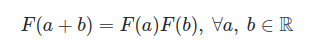

이제 이 준동형식을 현재 전개하던 GloVe 식에 적용할 수 있도록 조금씩 바꿔볼 겁니다. 전개하던 GloVe 식에 따르면, 함수 F는 결과값으로 스칼라 값(P(ik)/P(jk))이 나와야 합니다. 준동형식에서 a와 b가 각각 벡터값이라면 함수 F의 결과값으로는 스칼라 값이 나올 수 없지만, a와 b가 각각 사실 두 벡터의 내적값이라고 하면 결과값으로 스칼라 값이 나올 수 있습니다. 그러므로 위의 준동형식을 아래와 같이 바꿔보겠습니다. 여기서 v1,v2,v3,v4는 각각 벡터값입니다. 아래의 V는 벡터를 의미합니다.

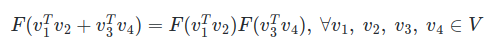

그런데 앞서 작성한 GloVe 식에서는 wi와 wj라는 두 벡터의 차이를 함수 F의 입력으로 받았습니다. GloVe 식에 바로 적용을 위해 준동형 식을 이를 뺄셈에 대한 준동형식으로 변경합니다. 그렇게 되면 곱셈도 나눗셈으로 바뀝니다

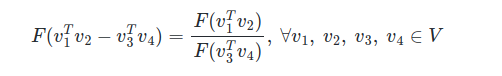

이제 이 준동형 식을 GloVe 식에 적용해보겠습니다. 우선, 함수 F의 우변은 다음과 같이 바뀌어야 합니다.

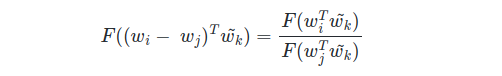

그런데 이전의 식에 따르면 우변은 본래 P(ik)/P(jk)였으므로, 결과적으로 다음과 같습니다.

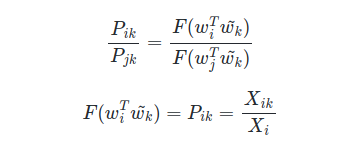

좌변을 풀어쓰면 다음과 같습니다.

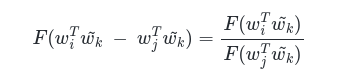

이는 뺄셈에 대한 준동형식의 형태와 정확히 일치합니다. 이제 이를 만족하는 함수 F를 찾아야 할 때입니다. 그리고 이를 정확하게 만족시키는 함수가 있는데 바로 지수 함수(Exponential function)입니다. F를 지수 함수 exp라고 해봅시다.

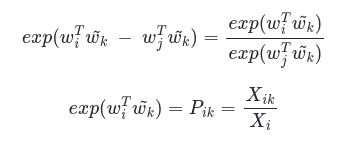

위의 두번째 식으로부터 다음과 같은 식을 얻을 수 있습니다.

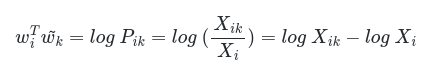

그런데 여기서 상기해야할 것은 앞서 언급했듯이, 사실 wi와 wk는 두 값의 위치를 서로 바꾸어도 식이 성립해야 합니다. 
의 정의를 생각해보면 X ik와도 같습니다. 그런데 이게 성립되려면 위의 식에서 log(X i)항이 걸림돌입니다. 이 부분만 없다면 이를 성립시킬 수 있습니다. 그래서 GloVe 연구팀은 이 log(X i)항을 wi에 대한 편향 bi라는 상수항으로 대체하기로 합니다. 같은 이유로 wk에 대한 편향 bk를 추가합니다.

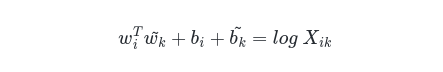

이 식이 손실 함수의 핵심이 되는 식입니다. 우변의 값과의 차이를 최소화는 방향으로 좌변의 4개의 항은 학습을 통해 값이 바뀌는 변수들이 됩니다. 즉, 손실 함수는 다음과 같이 일반화될 수 있습니다.

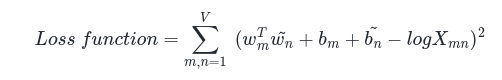

여기서 V는 단어 집합의 크기를 의미합니다. 그런데 아직 최적의 손실 함수라기에는 부족합니다. GloVe 연구진은 log(X ik)에서 (X ik)값이 0이 될 수 있음을 지적합니다. 대안 중 하나는 log(X ik)항을 log(1+Xik)로 변경하는 것입니다. 하지만 이렇게 해도 여전히 해결되지 않는 문제가 있습니다.

바로 동시 등장 행렬 X는 마치 DTM처럼 희소 행렬(Sparse Matrix)일 가능성이 다분하다는 점입니다. 동시 등장 행렬 
X에는 많은 값이 0이거나, 동시 등장 빈도가 적어서 많은 값이 작은 수치를 가지는 경우가 많습니다. 앞서 빈도수를 가지고 가중치를 주는 고민을 하는 TF-IDF나 LSA와 같은 몇 가지 방법들을 본 적이 있습니다. GloVe의 연구진은 동시 등장 행렬에서 동시 등장 빈도의 값 Xik이 굉장히 낮은 경우에는 정보에 거의 도움이 되지 않는다고 판단합니다. 그래서 이에 대한 가중치를 주는 고민을 하게 되는데 GloVe 연구팀이 선택한 것은 바로 Xik의 값에 영향을 받는 가중치 함수(Weighting function) f(Xik)를 손실 함수에 도입하는 것입니다.

GloVe에 도입되는 f(Xik)의 그래프를 보겠습니다.
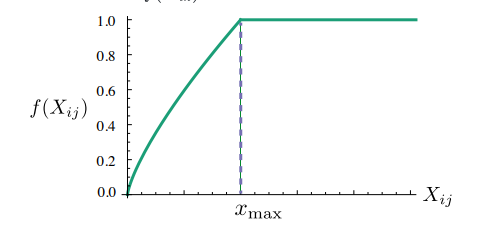

Xik의 값이 작으면 상대적으로 함수의 값은 작도록 하고, 값이 크면 함수의 값은 상대적으로 크도록 합니다. 하지만 
Xik가 지나치게 높다고해서 지나친 가중치를 주지 않기위해서 또한 함수의 최대값이 정해져 있습니다. (최대값은 1) 예를 들어 'It is'와 같은 불용어의 동시 등장 빈도수가 높다고해서 지나친 가중을 받아서는 안 됩니다. 이 함수의 값을 손실 함수에 곱해주면 가중치의 역할을 할 수 있습니다.

이 함수 f(x)의 식은 다음과 같이 정의됩니다.

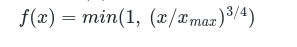

최종적으로 다음과 같은 일반화 된 손실 함수를 얻어낼 수 있습니다.

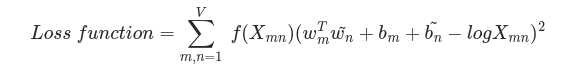

pip install glove-python3


In [110]:
#GloVe 훈련시키기
from glove import Corpus,Glove

corpus=Corpus()
glove=Glove(no_components=100,learning_rate=0.001)

corpus.fit(result,window=5)
glove.fit(corpus.matrix,epochs=10, no_threads=5,verbose=True)
glove.add_dictionary(corpus.dictionary)

model1=glove.most_similar('man')
print(model1)

model2=glove.most_similar('boy')
print(model2)

model3=glove.most_similar("university")
print(model3)

model4=glove.most_similar('water')
print(model4)

model5=glove.most_similar('physics')
print(model5)

model6=glove.most_similar('muscle')
print(model6)

model7=glove.most_similar('clean')
print(model7)

Performing 10 training epochs with 5 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
[('that', 0.9926987455326981), ('and', 0.9926782184105843), ('in', 0.9924499201314574), ('this', 0.99233661318834)]
[('old', 0.9632419795869038), ('since', 0.9624917235906832), ('real', 0.9619333329823018), ('stuff', 0.9609749635881292)]
[('next', 0.9674237982925376), ('oh', 0.9664056525444313), ('taken', 0.9645422703777637), ('problem', 0.964161480001585)]
[('a', 0.9932430385514641), ('that', 0.9930875522036896), ('same', 0.9930813370626108), ('in', 0.9930183444443839)]
[('control', 0.9365273217737518), ('full', 0.9364771392765985), ('complex', 0.9354087105660572), ('experience', 0.9352404751158212)]
[('quality', 0.6861968255967658), ('beings', 0.6771287064355372), ('success', 0.6767319273342988), ('issues', 0.6727753054890192)]
[('recently', 0.939079285307443), ('study', 0.9351627400720639), ('cost', 0.9344078964882413), ('ask', 0.9334907442073423)]


# 내부 단어를 고려하는 패스트텍스트(FastText)
단어를 벡터로 만드는 또 다른 방법으로는 페이스북에서 개발한 FastText가 있습니다. Word2Vec 이후에 나온 것이기 때문에, 메커니즘 자체는 Word2Vec의 확장이라고 볼 수 있습니다. **Word2Vec와 FastText와의 가장 큰 차이점이라면 Word2Vec는 단어를 쪼개질 수 없는 단위로 생각한다면, FastText는 하나의 단어 안에도 여러 단어들이 존재하는 것으로 간주합니다. 내부 단어. 즉, 서브워드(subword)를 고려하여 학습합니다.**

# 내부 단어(subword)의 학습
FastText에서는 각 단어는 글자 단위 n-gram의 구성으로 취급합니다. n을 몇으로 결정하는지에 따라서 단어들이 얼마나 분리되는지 결정됩니다. 예를 들어서 n을 3으로 잡은 트라이그램(tri-gram)의 경우, apple은 app, ppl, ple로 분리하고 이들을 벡터로 만듭니다. 더 정확히는 시작과 끝을 의미하는 <, >를 도입하여 아래의 5개 내부 단어(subword) 토큰을 벡터로 만듭니다.

apple
 n = 3인 경우
<ap, app, ppl, ple, le> 

그리고 여기에 추가적으로 하나를 더 벡터화하는데, 기존 단어에 <, 와 >를 붙인 토큰입니다.

특별 토큰
< apple >

다시 말해 n = 3인 경우, FastText는 단어 apple에 대해서 다음의 6개의 토큰을 벡터화하는 것입니다.
<ap, app, ppl, ple, le>, < apple >

그런데 실제 사용할 때는 n의 최소값과 최대값으로 범위를 설정할 수 있는데, 기본값으로는 각각 3과 6으로 설정되어져 있습니다. 다시 말해 최소값 = 3, 최대값 = 6인 경우라면, 단어 apple에 대해서 FastText는 아래 내부 단어들을 벡터화합니다.

 n = 3 ~ 6인 경우
<ap, app, ppl, ppl, le>, <app, appl, pple, ple>, <appl, pple>, ..., < apple >

여기서 내부 단어들을 벡터화한다는 의미는 저 단어들에 대해서 Word2Vec을 수행한다는 의미입니다. 위와 같이 내부 단어들의 벡터값을 얻었다면, 단어 apple의 벡터값은 저 위 벡터값들의 총 합으로 구성합니다.

apple = <ap + app + ppl + ppl + le> + <app + appl + pple + ple> + <appl + pple> + , ..., +< apple >
그리고 이런 방법은 Word2Vec에서는 얻을 수 없었던 강점을 가집니다.

모르는 단어(Out Of Vocabulary, OOV)에 대한 대응
FastText의 인공 신경망을 학습한 후에는 데이터 셋의 모든 단어의 각 n-gram에 대해서 워드 임베딩이 됩니다. 이렇게 되면 **장점은 데이터 셋만 충분한다면 위와 같은 내부 단어(Subword)를 통해 모르는 단어(Out Of Vocabulary, OOV)에 대해서도 다른 단어와의 유사도를 계산할 수 있다는 점입니다.**

가령, FastText에서 birthplace(출생지)란 단어를 학습하지 않은 상태라고 해봅시다. 하지만 다른 단어에서 birth와 place라는 내부 단어가 있었다면, FastText는 birthplace의 벡터를 얻을 수 있습니다. 이는 모르는 단어에 제대로 대처할 수 없는 Word2Vec, GloVe와는 다른 점입니다.

# 단어 집합 내 빈도 수가 적었던 단어(Rare Word)에 대한 대응
Word2Vec의 경우에는 등장 빈도 수가 적은 단어(rare word)에 대해서는 임베딩의 정확도가 높지 않다는 단점이 있었습니다. 참고할 수 있는 경우의 수가 적다보니 정확하게 임베딩이 되지 않는 경우입니다.

하지만 FastText의 경우, 만약 단어가 희귀 단어라도, 그 단어의 n-gram이 다른 단어의 n-gram과 겹치는 경우라면, Word2Vec과 비교하여 비교적 높은 임베딩 벡터값을 얻습니다.

FastText가 노이즈가 많은 코퍼스에서 강점을 가진 것 또한 이와 같은 이유입니다. 모든 훈련 코퍼스에 오타(Typo)나 맞춤법이 틀린 단어가 없으면 이상적이겠지만, 실제 많은 비정형 데이터에는 오타가 섞여있습니다. 그리고 오타가 섞인 단어는 당연히 등장 빈도수가 매우 적으므로 일종의 희귀 단어가 됩니다. **즉, Word2Vec에서는 오타가 섞인 단어는 임베딩이 제대로 되지 않지만 FastText는 이에 대해서도 일정 수준의 성능을 보입니다.**

예를 들어 단어 apple과 오타로 p를 한 번 더 입력한 appple의 경우에는 실제로 많은 개수의 동일한 n-gram을 가질 것입니다.


In [114]:
#word2vec
model.wv.most_similar('electrofishing')

#에러 메시지는 단어 집합(Vocabulary)에 electrofishing이 존재하지 않는다고 합니다. 
#이처럼 Word2Vec는 학습 데이터에 존재하지 않는 단어. 
#즉, 모르는 단어에 대해서는 임베딩 벡터가 존재하지 않기 때문에 단어의 유사도를 계산할 수 없습니다.



KeyError: "Key 'electrofishing' not present in vocabulary"

In [124]:
#FastText
from gensim.models import FastText
model=FastText(result,vector_size=100,window=5,min_count=5,workers=4,sg=1)

model.wv.most_similar('electrofishing')

#Word2Vec는 학습하지 않은 단어에 대해서 유사한 단어를 찾아내지 못 했지만, FastText는 유사한 단어를 계산해서 출력하고 있음을 볼 수 있습니다.

[('electrolyte', 0.860292375087738),
 ('electrolux', 0.8596175909042358),
 ('electro', 0.8505196571350098),
 ('electroshock', 0.8501076102256775),
 ('electroencephalogram', 0.8419670462608337),
 ('electric', 0.8255612850189209),
 ('electrogram', 0.8254584670066833),
 ('electrochemical', 0.8233408331871033),
 ('electronic', 0.8168327808380127),
 ('electron', 0.8106080889701843)]

# 한국어에서의 FastText

한국어의 경우에도 OOV 문제를 해결하기 위해 FastText를 적용하고자 하는 시도들이 있었습니다.

(1) 음절 단위
예를 들어서 음절 단위의 임베딩의 경우에 n=3일때 ‘자연어처리’라는 단어에 대해 n-gram을 만들어보면 다음과 같습니다.

<자연, 자연어, 연어처, 어처리, 처리>
(2) 자모 단위
이제 더 나아가 자모 단위(초성, 중성, 종성 단위)로 임베딩하는 시도 또한 있었습니다. 음절 단위가 아니라, 자모 단위로 가게 되면 오타나 노이즈 측면에서 더 강한 임베딩을 기대해볼 수 있습니다. 예를 들어 ‘자연어처리’라는 단어에 대해서 초성, 중성, 종성을 분리하고, 만약, 종성이 존재하지 않는다면 ‘_’라는 토큰을 사용한다고 가정한다면 ‘자연어처리’라는 단어는 아래와 같이 분리가 가능합니다.

분리된 결과 : ㅈ ㅏ _ ㅇ ㅕ ㄴ ㅇ ㅓ _ ㅊ ㅓ _ ㄹ ㅣ _

그리고 분리된 결과에 대해서 n=3일 때, n-gram을 적용하여, 임베딩을 한다면 다음과 같습니다.

< ㅈ ㅏ, ㅈ ㅏ _, ㅏ _ ㅇ, ... 중략>
